In [11]:
import torch
import matplotlib.pyplot as plt

In [14]:
#dataset generation
X=torch.normal(0,1,(100,4))
X[:,2]=3*X[:,0] - 2* X[:,1]+torch.normal(0,0.1,(100,))
X[:,3]=1.5*X[:,0] - 0.5* X[:,1]+torch.normal(0,0.1,(100,))

In [15]:
#dataset standardisation
X_mean = X.mean(dim=0)
X_centered = X - X_mean

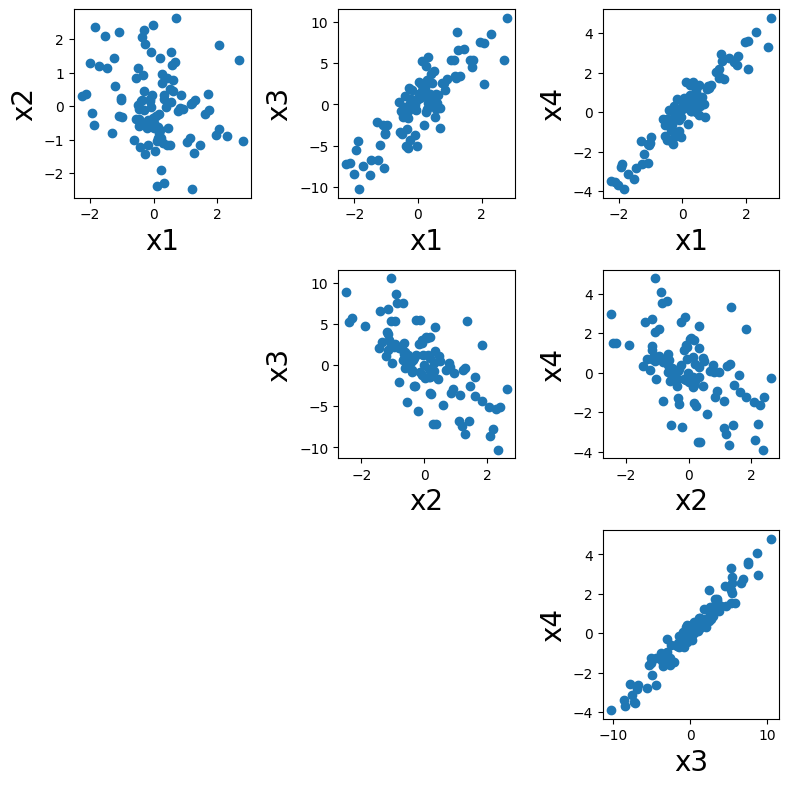

In [16]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j>i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i].numpy(),X[:,j].numpy())
            plt.xlabel(f'x{i+1}',fontsize=20)
            plt.ylabel(f'x{j+1}',fontsize=20)
plt.tight_layout()

In [17]:
# covariance matrix
cov_matrix = torch.mm(X_centered.T, X_centered) / (X_centered.shape[0] - 1)


In [18]:
#eigenvalue decomposition
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

In [19]:
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [20]:
X_pca = torch.mm(X_centered, eigenvectors)

In [21]:
print("Original data shape:", X.shape)
print("Transformed data shape:", X_pca.shape)
print("Principal Components:\n", eigenvectors)
print("Explained Variance:", eigenvalues)

Original data shape: torch.Size([100, 4])
Transformed data shape: torch.Size([100, 4])
Principal Components:
 tensor([[-0.1926,  0.4930, -0.1471,  0.8356],
        [ 0.1581,  0.7923, -0.3291, -0.4889],
        [-0.8950, -0.1080, -0.3788, -0.2093],
        [-0.3699,  0.3430,  0.8524, -0.1376]])
Explained Variance: tensor([2.1830e+01, 1.0503e+00, 9.5781e-03, 8.0374e-04])


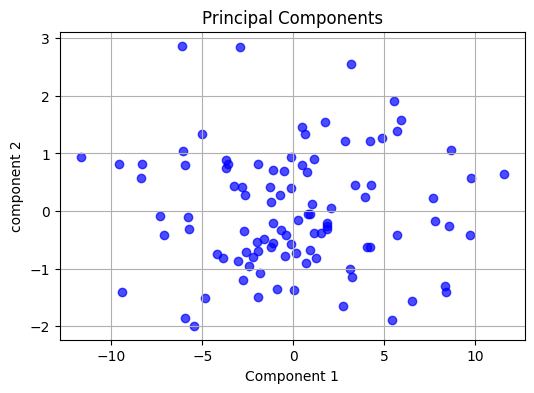

In [22]:
#plotting after reduction of dimensionality
pc1=X_pca[:,0]
pc2=X_pca[:,1]
plt.figure(figsize=(6,4))
plt.scatter(pc1.numpy(),pc2.numpy(),color='blue',alpha=0.7)

plt.xlabel('Component 1')
plt.ylabel('component 2')
plt.title('Principal Components')
plt.grid()
plt.show()